<a target="_blank" href="https://colab.research.google.com/github/Andrew-mcArty/RL_AAPGAB/blob/main/estudio_td.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [10]:
!curl -O https://raw.githubusercontent.com/Andrew-mcArty/RL_AAPGAB/refs/heads/main/src/FrozenAgent.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 31428  100 31428    0     0   146k      0 --:--:-- --:--:-- --:--:--  151k


In [1]:
from __future__ import annotations
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
import gymnasium as gym
import FrozenAgent
import random
import time

semilla=100

Cargamos el entorno

In [2]:


print("definimos el entorno:")
name = 'FrozenLake-v1'
env4 = gym.make(name, is_slippery=False, map_name="4x4", render_mode="ansi") # No resbaladizo para entender mejor los resultados.
env8 = gym.make(name, is_slippery=False, map_name="8x8", render_mode="ansi") # No resbaladizo para entender mejor los resultados.


definimos el entorno:


Función útil para establecer la semilla tanto en numpy como en la librería random

In [3]:

def setSemilla(semilla):
    random.seed(semilla)
    np.random.seed(semilla)


Algorimto genérico de para evaluar un agente

In [6]:

def train_agent(agent, env, num_episodes=5000, decay=False, semilla=1):
    #inicializamos el agente
    agent.initAgent()
    for episode in tqdm(range(num_episodes)):
        state, info = env.reset(seed=semilla)
        done = False
    
        #inicializo el episodio
        agent.initEpisode()
    
        # play one episode
        while not done:
            if decay:
                agent.decay_epsilon()
            action = agent.get_action(env, state)
            
            next_state, reward, terminated, truncated, info = env.step(action)

            # update the agent
            agent.updateStep(state, action, reward, terminated, next_state)
            
            # update if the environment is done and the current state
            done = terminated or truncated
            state = next_state
            
        #después de acabar el episodio actualizo la Q y el epsilon
        agent.updateEpisode()


Muestra los resultados recogidos por el agente durante su entrenamiento. Esta función muestra dos indicadores que implementan todos los agentes: 
* proporción de recompensas: suma recompensas / episodios
* proporción de tamaño de episodios: suma len(episodio) / episodios

In [7]:


def plot2(agent1,agent2,num):
  # Creamos una lista de índices para el eje x
  indices1 = list(range(len(agent1.list_stats)))
  indices2 = list(range(len(agent2.list_stats)))
    
  # Crear figura con dos subgráficos
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

  # Primer subplot
  ax1.plot(indices1[:num], agent1.list_stats[:num], label=agent1)
  ax1.plot(indices2[:num], agent2.list_stats[:num], label=agent2)
  ax1.set_title('Proporción de recompensas')
  ax1.set_xlabel('Episodio')
  ax1.set_ylabel('Proporción')
  ax1.legend()
  ax1.grid(True)

  # Segundo subplot
  ax2.plot(indices1[:num], agent1.list_episodes[:num], label=agent1)
  ax2.plot(indices2[:num], agent2.list_episodes[:num], label=agent2)
  ax2.set_title('Tamaño de episodios')
  ax2.set_xlabel('Episodio')
  ax2.set_ylabel('Tamaño')
  ax2.legend()
  ax2.grid(True)

  # Primer subplot
  ax3.plot(indices1, agent1.list_stats, label=agent1)
  ax3.plot(indices2, agent2.list_stats, label=agent2)
  ax3.set_title('Proporción de recompensas')
  ax3.set_xlabel('Episodio')
  ax3.set_ylabel('Proporción')
  ax3.legend()
  ax3.grid(True)

  # Segundo subplot
  ax4.plot(indices1, agent1.list_episodes, label=agent1)
  ax4.plot(indices2, agent2.list_episodes, label=agent2)
  ax4.set_title('Tamaño de episodios')
  ax4.set_xlabel('Episodio')
  ax4.set_ylabel('Tamaño')
  ax4.legend()
  ax4.grid(True)

  # Ajustar diseño y mostrar gráfico
  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()  



Definimos dos agentes: SARSA y Q-Learning.

Ejecutamos en entrenameiento y obtenemos la mejor política de cada uno

In [10]:


#inicializo los numeros aleatorios
setSemilla(semilla)

# hyperparameters
n_episodes = 5000
start_epsilon = 0.1
alpha = 0.5
discount_factor = 0.99

agent1 = FrozenAgent.FrozenAgentSARSA(
    env=env4,
    epsilon=start_epsilon,
    alpha=alpha,
    discount_factor=discount_factor,
)
agent2 = FrozenAgent.FrozenAgentQ_Learning(
    env=env4,
    epsilon=start_epsilon,
    alpha=alpha,
    discount_factor=discount_factor,
)
setSemilla(semilla)
train_agent(agent1, env4, num_episodes=n_episodes, decay=False, semilla=semilla)
setSemilla(semilla)
train_agent(agent2, env4, num_episodes=n_episodes, decay=False, semilla=semilla)

pi1, actions1 = agent1.pi_star_from_Q(env4, agent1.Q)
pi2, actions2 = agent2.pi_star_from_Q(env4, agent2.Q)


100%|██████████| 5000/5000 [00:02<00:00, 2019.39it/s]


Mostramos resultados

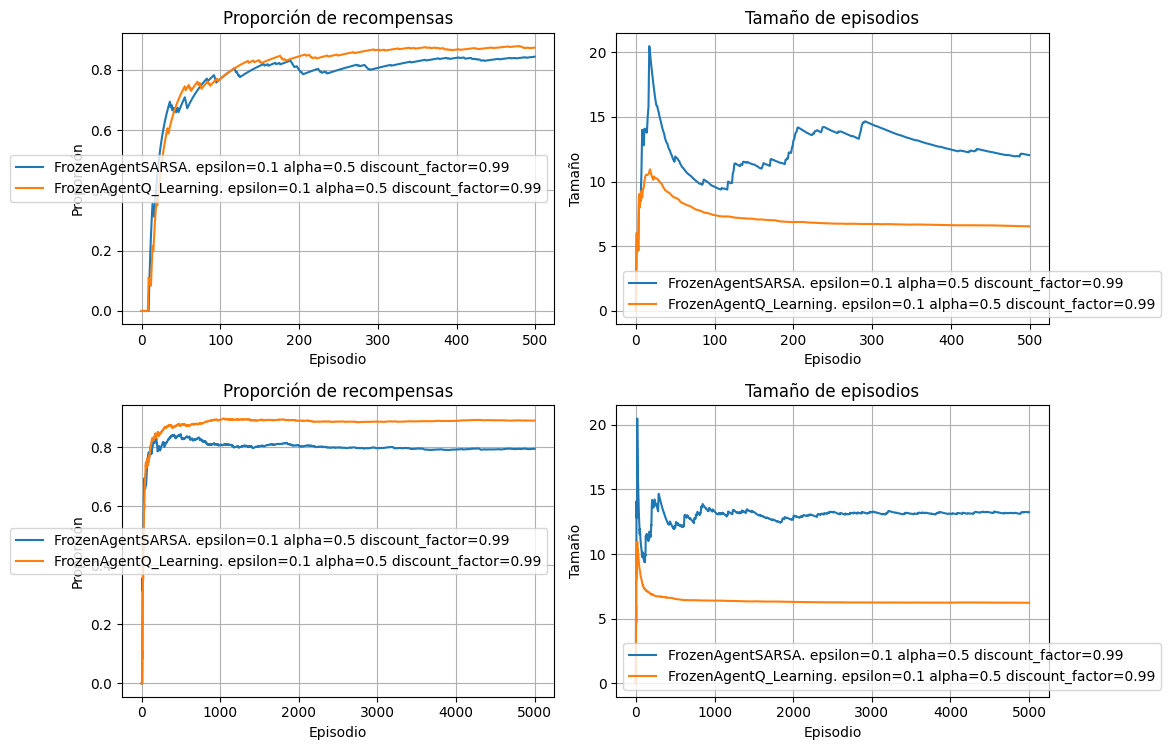

In [11]:
plot2(agent1,agent2,500)


Aparentemente parece que Q-Learning es mejor que SARSA

In [13]:
print(f"================== AGENTE 1 {agent1}")
print(f"Máxima proporcion: {agent1.list_stats[-1]}")
print("Valores Q para cada estado:\n", agent1.Q)
print("Política óptima obtenida\n", pi1, f"\n Acciones {actions1} \n Para el siguiente grid\n", env4.render())
print()

print(f"================== AGENTE 2 {agent2}")
print(f"Máxima proporcion: {agent2.list_stats[-1]}")
print("Valores Q para cada estado:\n", agent2.Q)
print("Política óptima obtenida\n", pi2, f"\n Acciones {actions2} \n Para el siguiente grid\n", env4.render())
print()

================== AGENTE 1 FrozenAgentSARSA. epsilon=0.1 alpha=0.5 discount_factor=0.99
Máxima proporcion: 0.7942
Valores Q para cada estado:
 [[5.53632234e-01 5.03693735e-01 6.18423546e-01 5.55273668e-01]
 [5.58928457e-01 7.07474928e-74 8.12823454e-01 5.43603811e-01]
 [5.49631891e-01 9.58928293e-01 2.43976762e-01 3.25579305e-01]
 [6.44233760e-01 1.13686838e-13 3.17836824e-01 3.18696705e-01]
 [4.19127600e-01 3.99484397e-01 9.72346137e-63 6.03137921e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.29246971e-26 9.80099999e-01 2.58493941e-26 8.09792424e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.21182888e-01 6.31088724e-30 8.81499156e-01 2.58752783e-01]
 [4.70916135e-01 9.68957246e-01 6.95737371e-01 3.55271368e-15]
 [5.64872079e-01 9.90000000e-01 1.57772181e-30 8.98970487e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.90734863e-06 7.12969776e-01 9.865

In [14]:

#inicializo los numeros aleatorios
setSemilla(semilla)

# hyperparameters
n_episodes = 5000
start_epsilon = 0.1
alpha = 0.5
discount_factor = 0.99

agent1 = FrozenAgent.FrozenAgentSARSA(
    env=env8,
    epsilon=start_epsilon,
    alpha=alpha,
    discount_factor=discount_factor,
)
agent2 = FrozenAgent.FrozenAgentQ_Learning(
    env=env8,
    epsilon=start_epsilon,
    alpha=alpha,
    discount_factor=discount_factor,
)
setSemilla(semilla)
train_agent(agent1, env8, num_episodes=n_episodes, decay=False, semilla=semilla)
setSemilla(semilla)
train_agent(agent2, env8, num_episodes=n_episodes, decay=False, semilla=semilla)

pi1, actions1 = agent1.pi_star_from_Q(env8, agent1.Q)
pi2, actions2 = agent2.pi_star_from_Q(env8, agent2.Q)


100%|██████████| 5000/5000 [00:05<00:00, 846.45it/s]


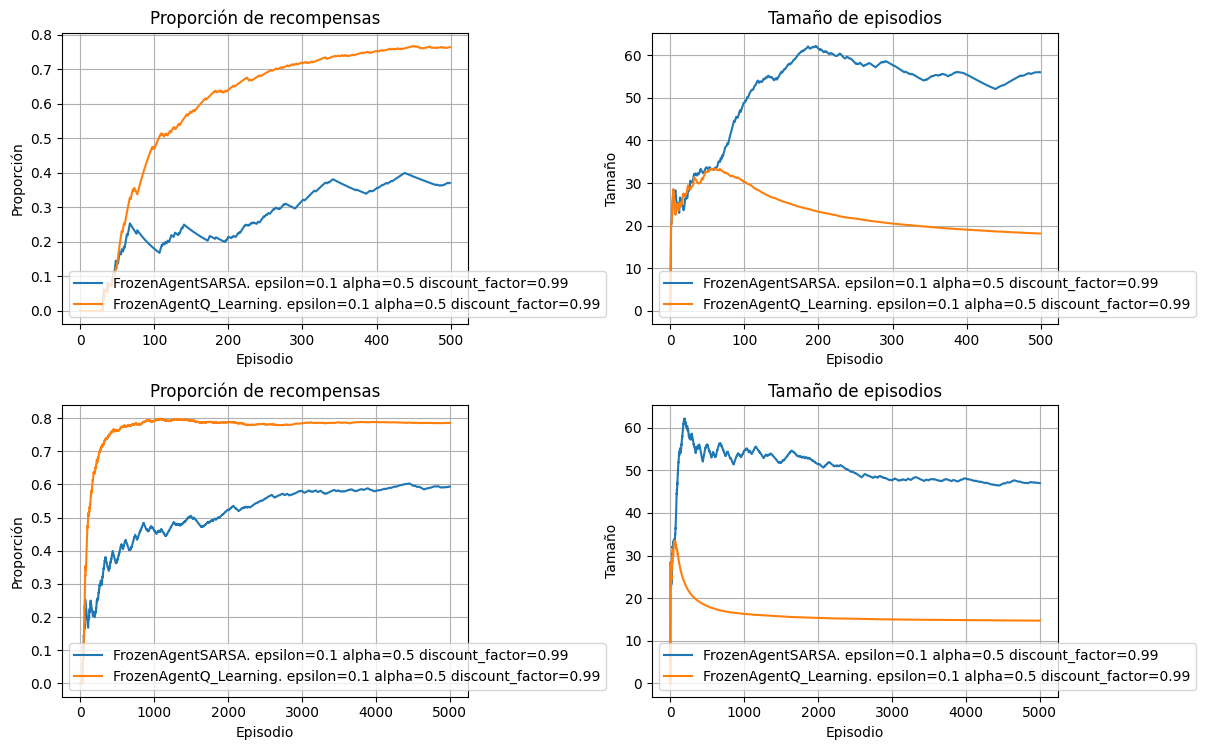

In [15]:
plot2(agent1,agent2,500)

In [16]:
print(f"================== AGENTE 1 {agent1}")
print(f"Máxima proporcion: {agent1.list_stats[-1]}")
print("Valores Q para cada estado:\n", agent1.Q)
print("Política óptima obtenida\n", pi1, f"\n Acciones {actions1} \n Para el siguiente grid\n", env4.render())
print()

print(f"================== AGENTE 2 {agent2}")
print(f"Máxima proporcion: {agent2.list_stats[-1]}")
print("Valores Q para cada estado:\n", agent2.Q)
print("Política óptima obtenida\n", pi2, f"\n Acciones {actions2} \n Para el siguiente grid\n", env4.render())
print()

================== AGENTE 1 FrozenAgentSARSA. epsilon=0.1 alpha=0.5 discount_factor=0.99
Máxima proporcion: 0.594
Valores Q para cada estado:
 [[4.38852180e-01 4.38859998e-01 5.74983256e-01 4.38036938e-01]
 [4.41571740e-01 4.37661377e-01 5.73912759e-01 4.43041118e-01]
 [4.37354379e-01 4.30776927e-01 5.73932838e-01 4.67776799e-01]
 [4.42100272e-01 4.58031959e-01 6.14055532e-01 4.45797063e-01]
 [4.50153425e-01 4.61385949e-01 6.57952874e-01 4.62180322e-01]
 [4.66274007e-01 4.58990174e-01 7.10555025e-01 5.96748299e-01]
 [5.24370168e-01 7.96395613e-01 4.68576635e-01 5.35694263e-01]
 [4.87008776e-01 4.93850446e-01 4.87017256e-01 4.54960237e-01]
 [4.32863035e-01 4.04772838e-01 4.25214559e-01 4.91912624e-01]
 [4.31138034e-01 3.84210205e-01 4.08359382e-01 4.46391796e-01]
 [4.34029774e-01 3.80684386e-01 4.57396724e-01 4.32772604e-01]
 [4.36219995e-01 3.38813179e-21 5.26938095e-01 4.38840785e-01]
 [4.04640316e-01 4.26737404e-01 4.32082887e-01 6.18301210e-01]
 [5.12878212e-01 4.10959050e-01 4.4239